In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/adult-income-dataset/adult.csv')
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [50]:
df = df.join([pd.get_dummies(df.workclass).astype(int).add_prefix('workclass_')])
df = df.join([pd.get_dummies(df['marital-status']).astype(int).add_prefix('marital_')])
df = df.join([pd.get_dummies(df.relationship).astype(int).add_prefix('relation_')])
df = df.join([pd.get_dummies(df.race).astype(int).add_prefix('race_')])
df = df.join([pd.get_dummies(df['native-country']).astype(int).add_prefix('native_')])
df = df.join([pd.get_dummies(df.occupation).astype(int).add_prefix('occ_')])
df = df.join([pd.get_dummies(df.gender).astype(int).add_prefix('gender_')])


#now drop the columns that are already one hot encoded
df = df.drop(['workclass'],axis=1)
df = df.drop(['marital-status'],axis=1)
df = df.drop(['relationship'],axis=1)
df = df.drop(['race'],axis=1)
df = df.drop(['native-country'],axis=1)
df = df.drop(['education'],axis=1)
df = df.drop(['occupation'],axis=1)
df = df.drop(['gender'],axis=1)


#NOW encode the target feature
df['income'] = df['income'].apply(lambda x:1 if x == '>50K' else 0)

df.head()

age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
4   18  103497               10             0             0              30   

   income  workclass_?  workclass_Federal-gov  workclass_Local-gov  ...  \
0       0            0                      0                    0  ...   
1       0            0                      0                    0  ...   
2       1            0                      0                    1  ...   
3       1            0                      0                    0  ...   
4       0            1                      0                    0  ...   

   occ_Machine-op-inspct  occ_Other-service  occ_Priv-house-serv  \
0                      1                  0                    0   
1                      0                  0                    0   
2                      0                  0                    0   
3                      1                  0                    0   
4                      0                  0                    0   

   occ_Prof-specialty  occ_Protective-serv  occ_Sales  occ_Tech-support  \
0                   0                    0          0                 0   
1                   0                    0          0                 0   
2                   0                    1          0                 0   
3                   0                    0          0                 0   
4                   0                    0          0                 0   

   occ_Transport-moving  gender_Female  gender_Male  
0                     0              0            1  
1                     0              0            1  
2                     0              0            1  
3                     0              0            1  
4                     0              1            0  

[5 rows x 93 columns]

In [51]:
df['income'].value_counts()

income
0    37155
1    11687
Name: count, dtype: int64

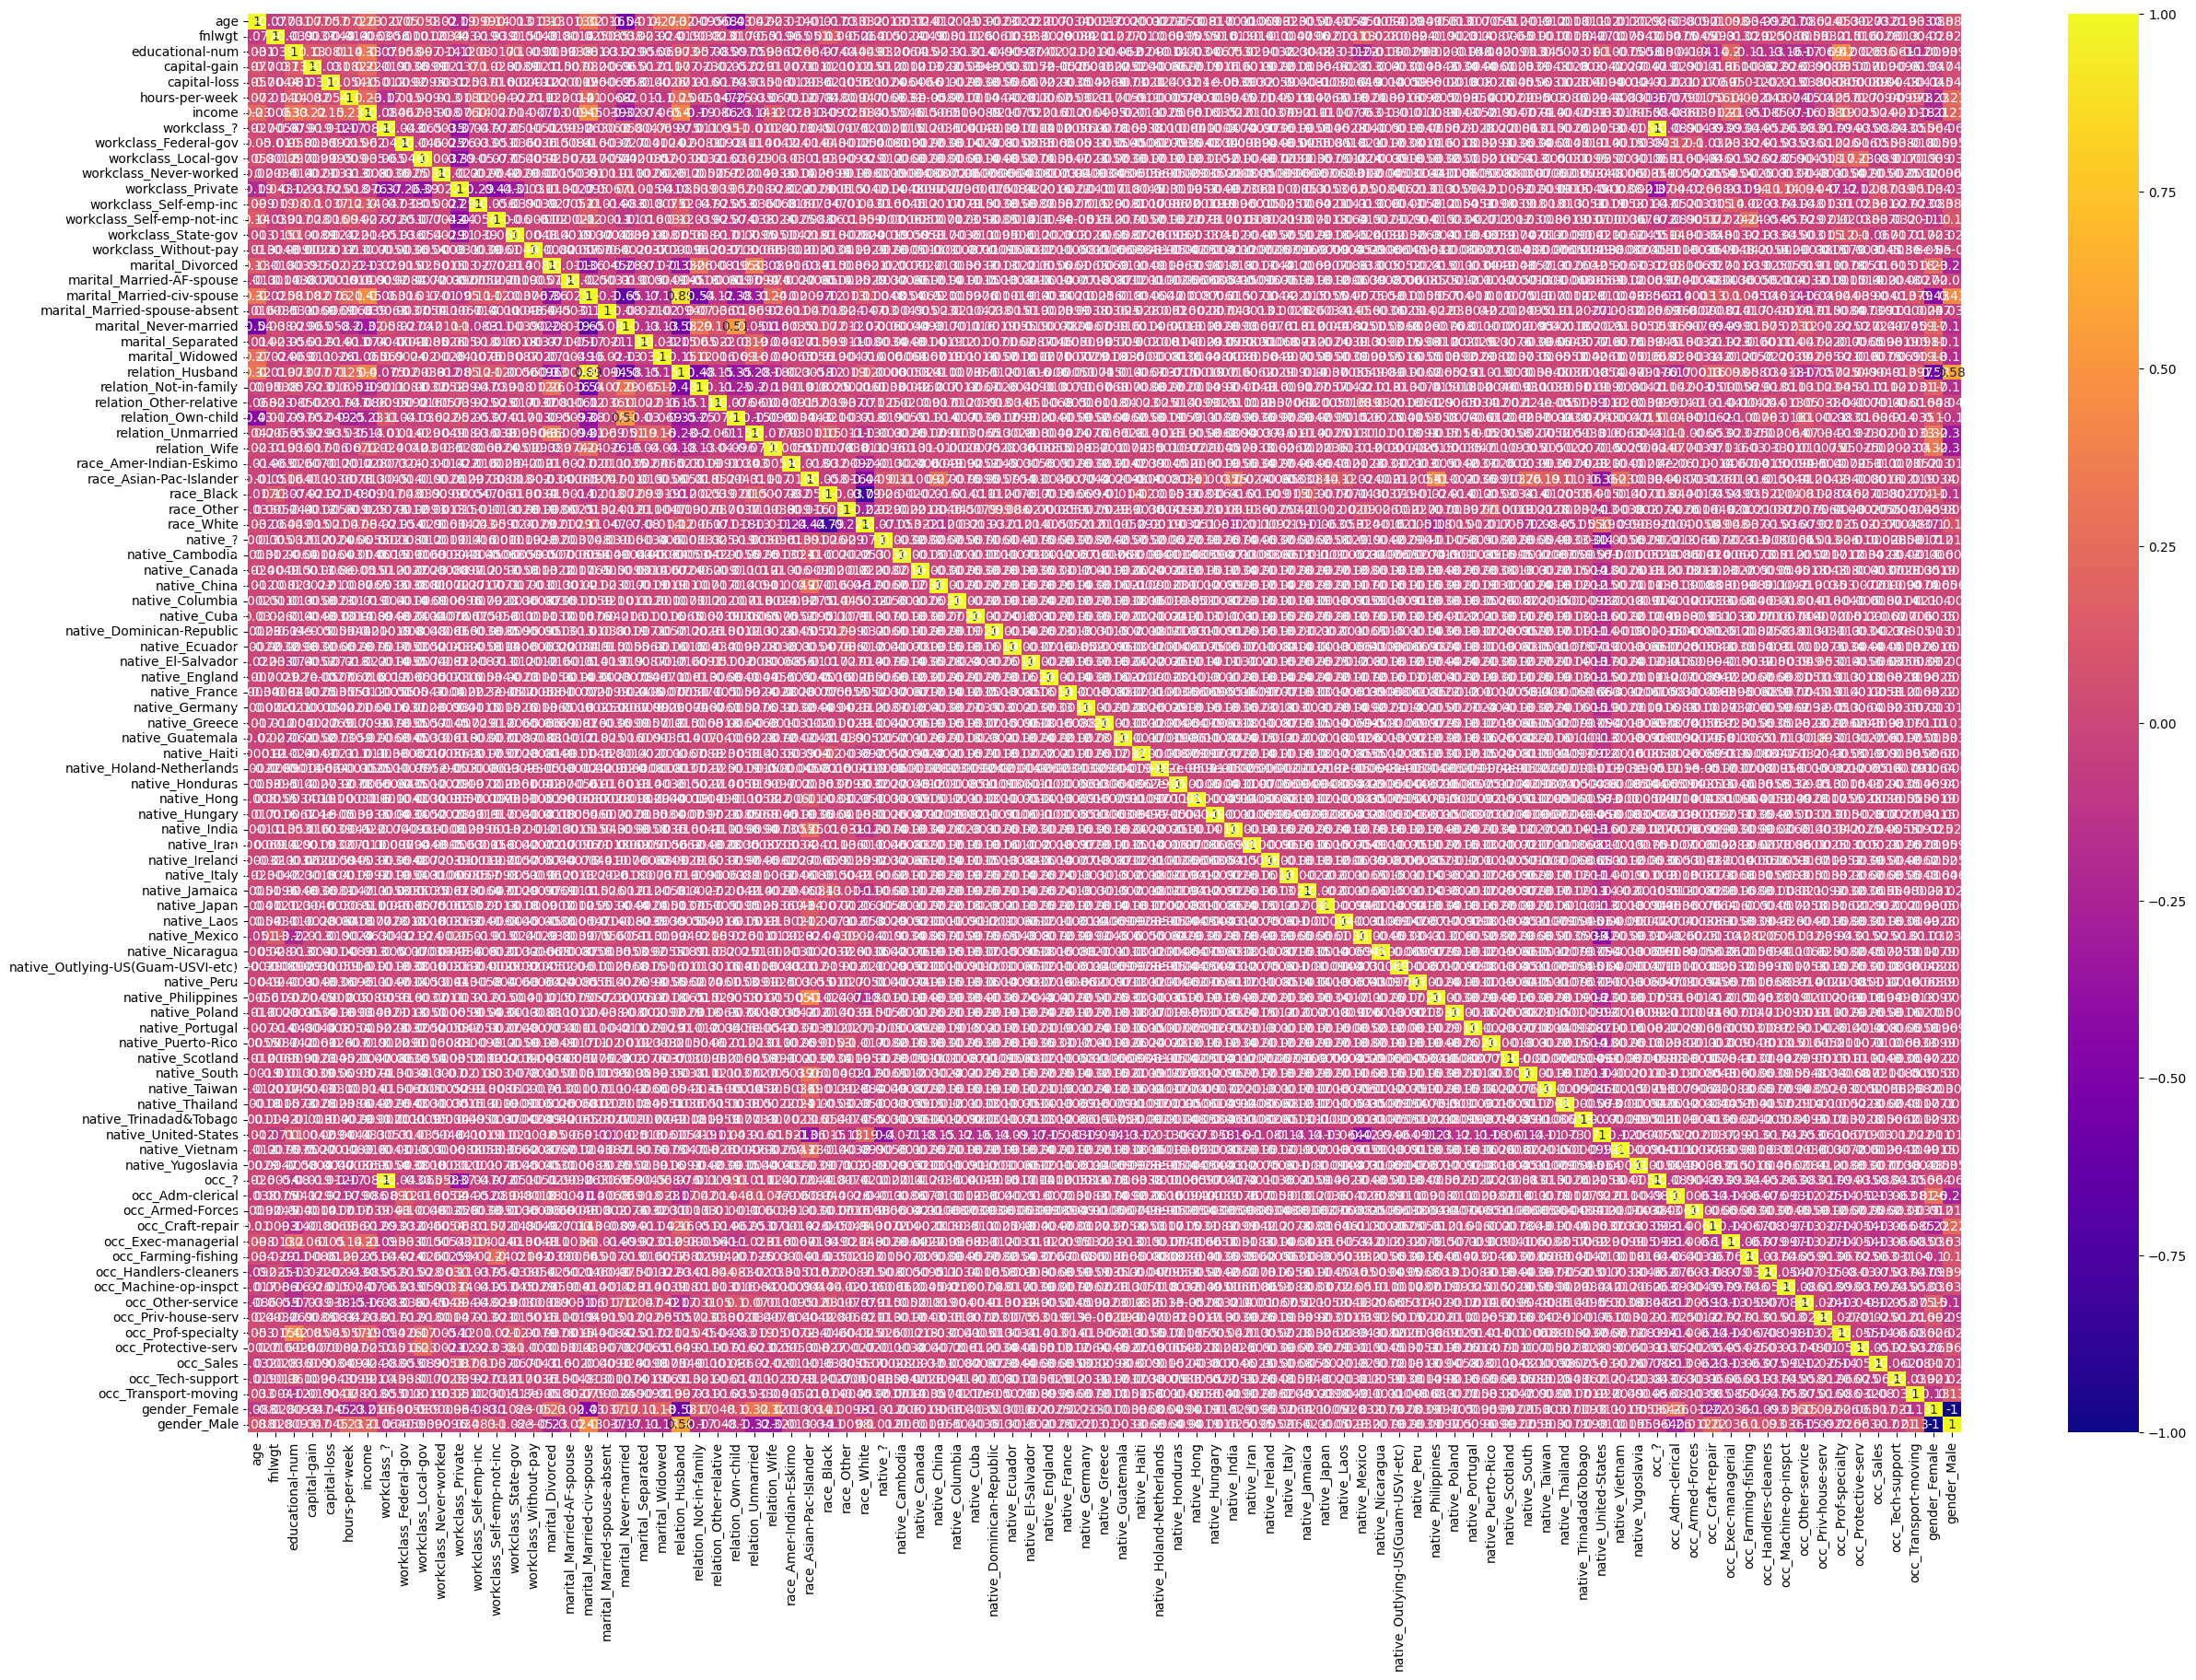

In [52]:
corr = df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

In [54]:
corrs = df.corr()['income'].abs()
sorted_corrs = corrs.sort_values()
cols_to_be_dropped = int(0.8*len(df.columns))
cols_dropped = sorted_corrs.iloc[:cols_to_be_dropped].index
#df1 is the reduced df after dropping the cols
df1 = df.drop(cols_dropped,axis=1)

df1.head()

age  educational-num  capital-gain  capital-loss  hours-per-week  income  \
0   25                7             0             0              40       0   
1   38                9             0             0              50       0   
2   28               12             0             0              40       1   
3   44               10          7688             0              40       1   
4   18               10             0             0              30       0   

   workclass_Self-emp-inc  marital_Divorced  marital_Married-civ-spouse  \
0                       0                 0                           0   
1                       0                 0                           1   
2                       0                 0                           1   
3                       0                 0                           1   
4                       0                 0                           0   

   marital_Never-married  relation_Husband  relation_Not-in-family  \
0                      1                 0                       0   
1                      0                 1                       0   
2                      0                 1                       0   
3                      0                 1                       0   
4                      1                 0                       0   

   relation_Own-child  relation_Unmarried  occ_Exec-managerial  \
0                   1                   0                    0   
1                   0                   0                    0   
2                   0                   0                    0   
3                   0                   0                    0   
4                   1                   0                    0   

   occ_Other-service  occ_Prof-specialty  gender_Female  gender_Male  
0                  0                   0              0            1  
1                  0                   0              0            1  
2                  0                   0              0            1  
3                  0                   0              0            1  
4                  0                   0              1            0

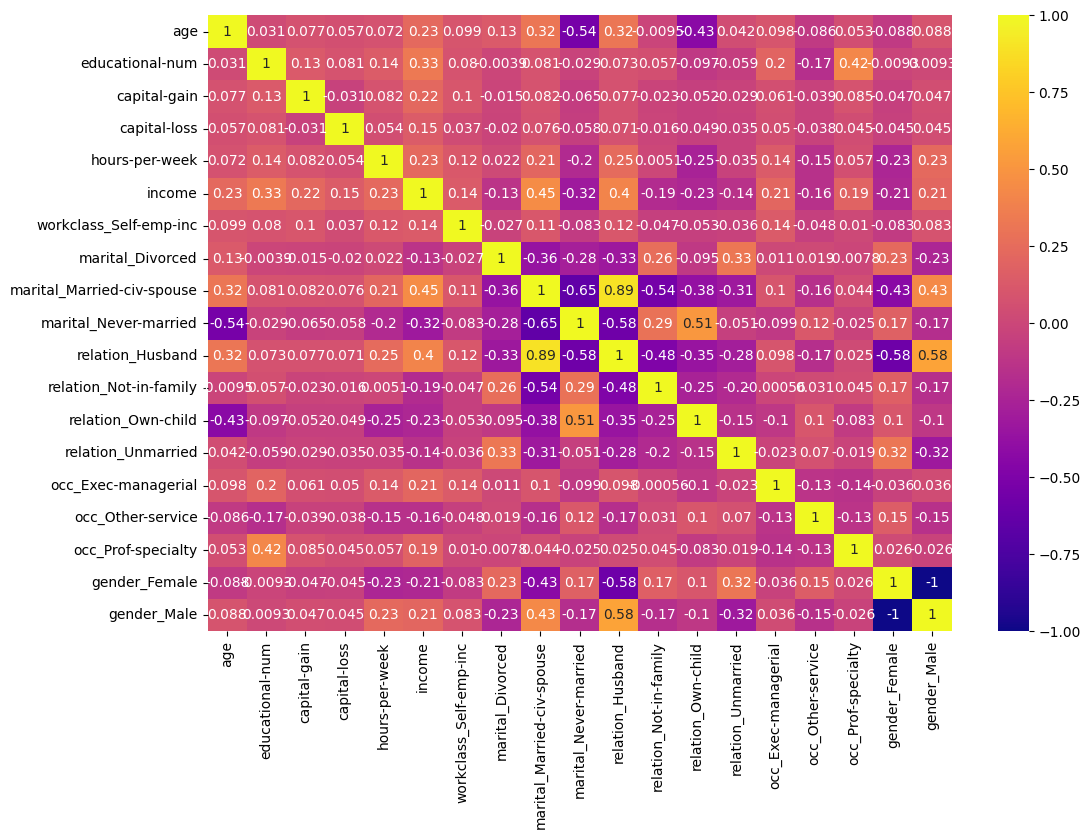

In [56]:
corr = df1.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

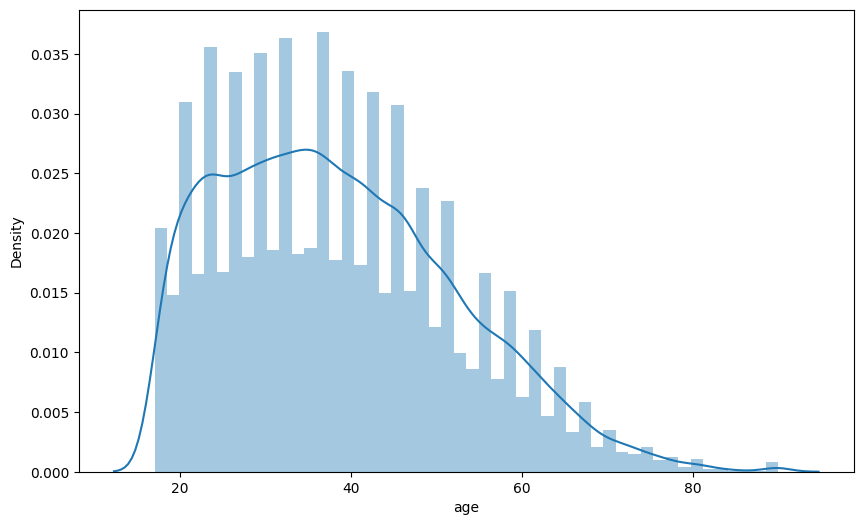

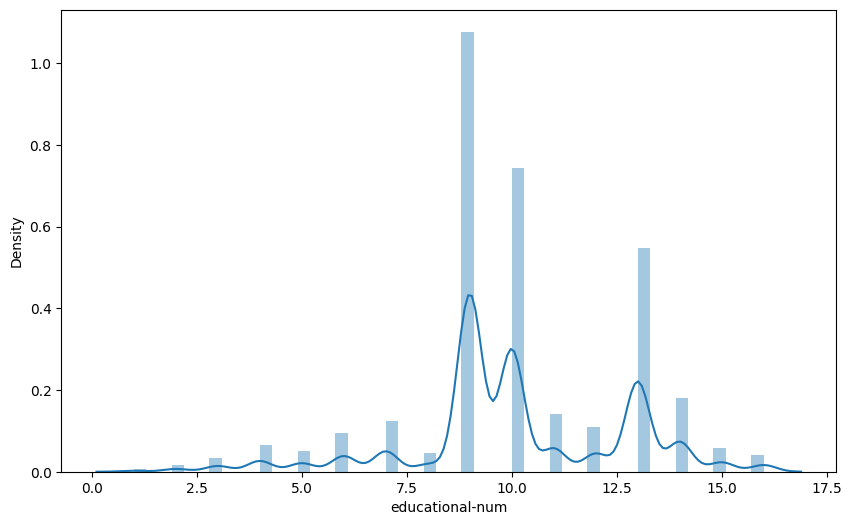

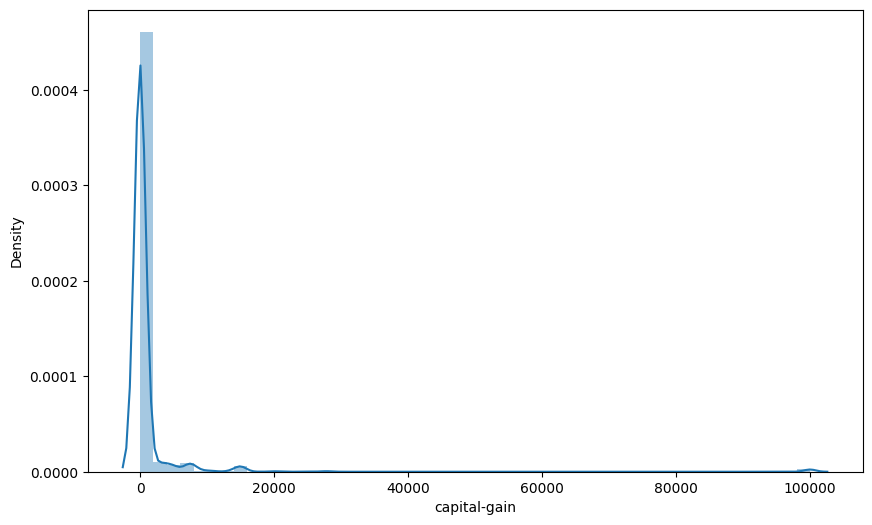

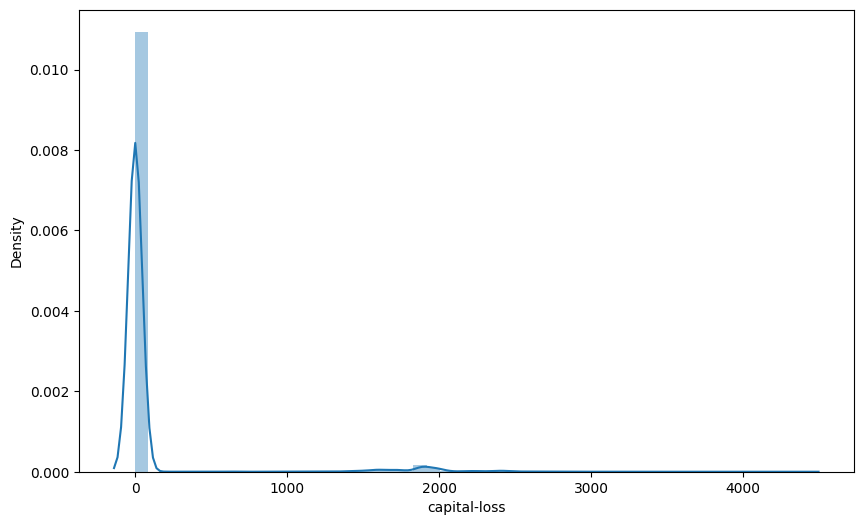

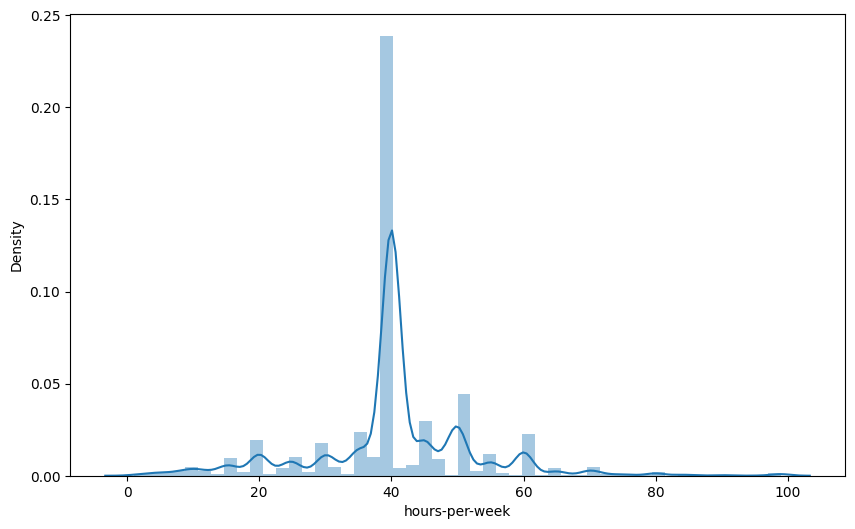

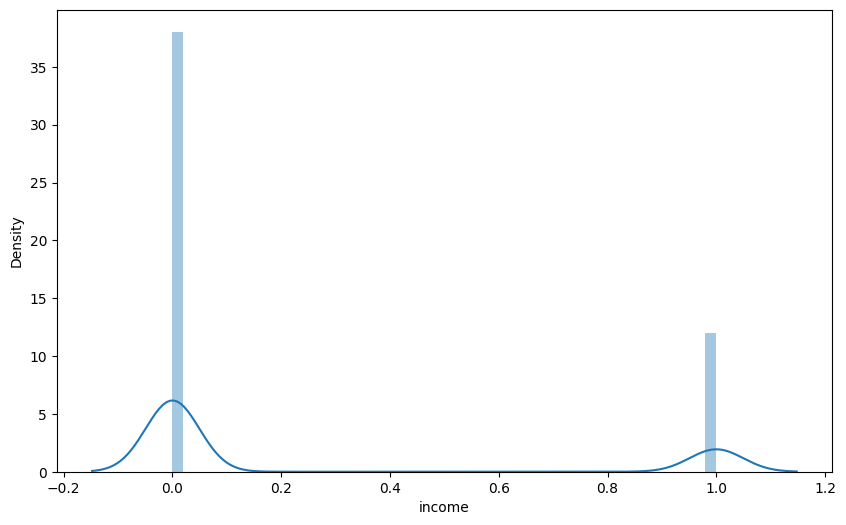

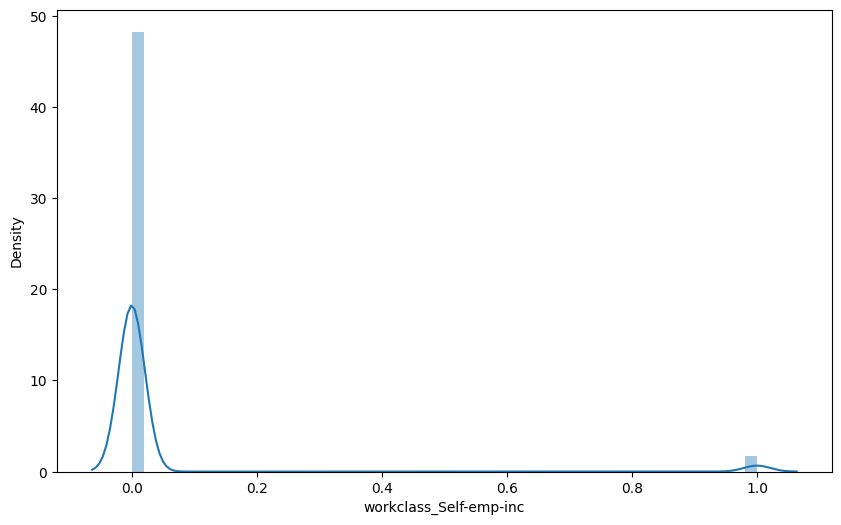

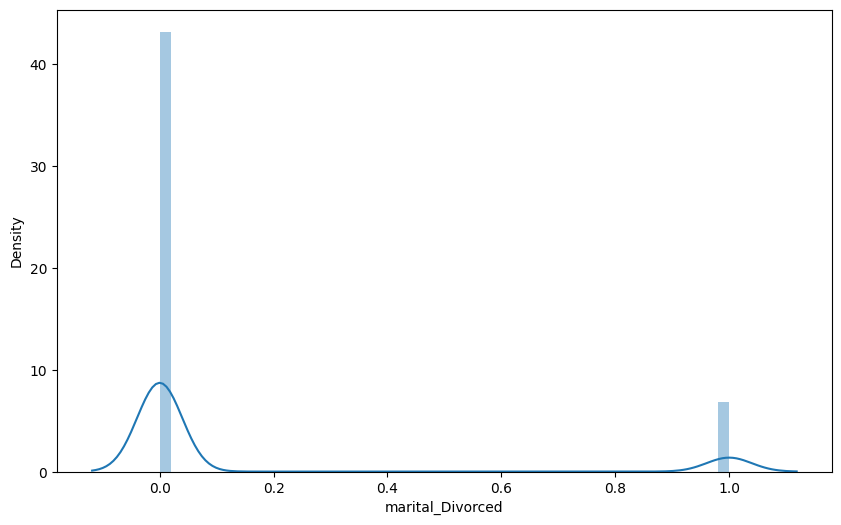

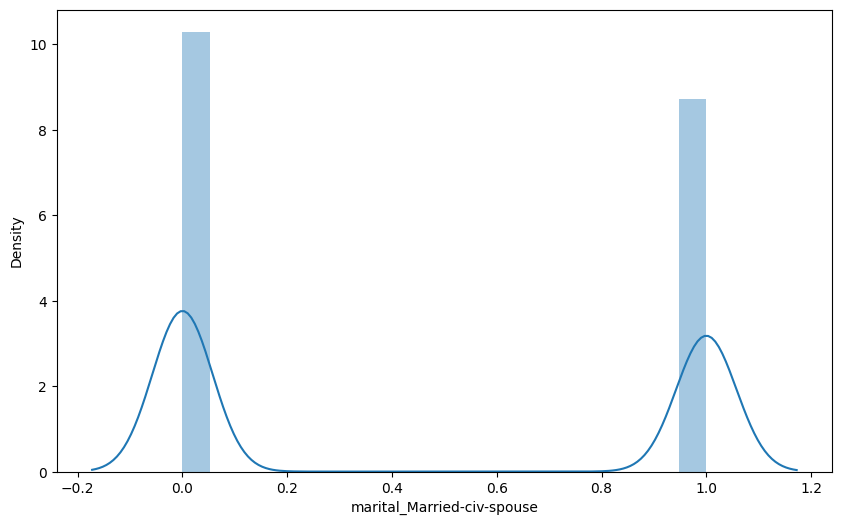

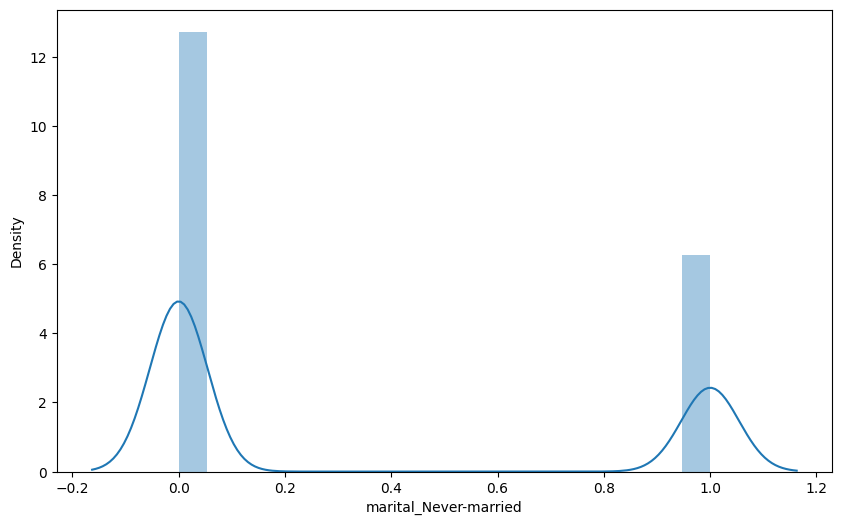

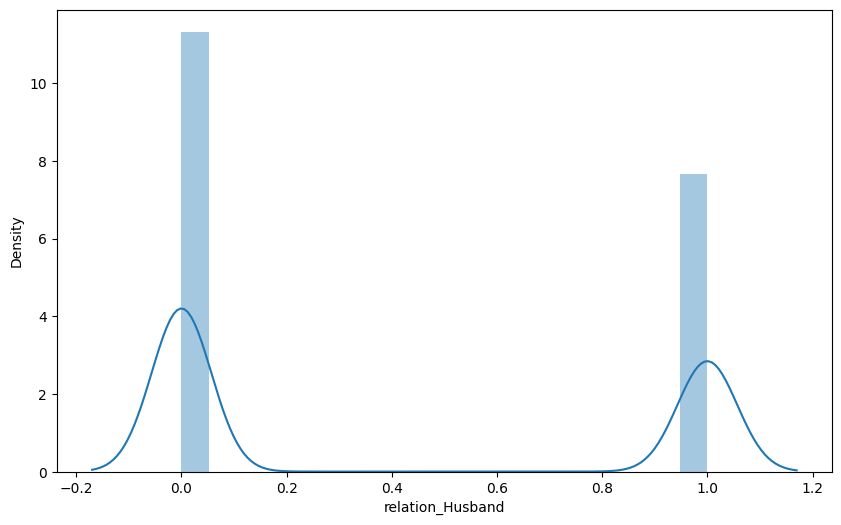

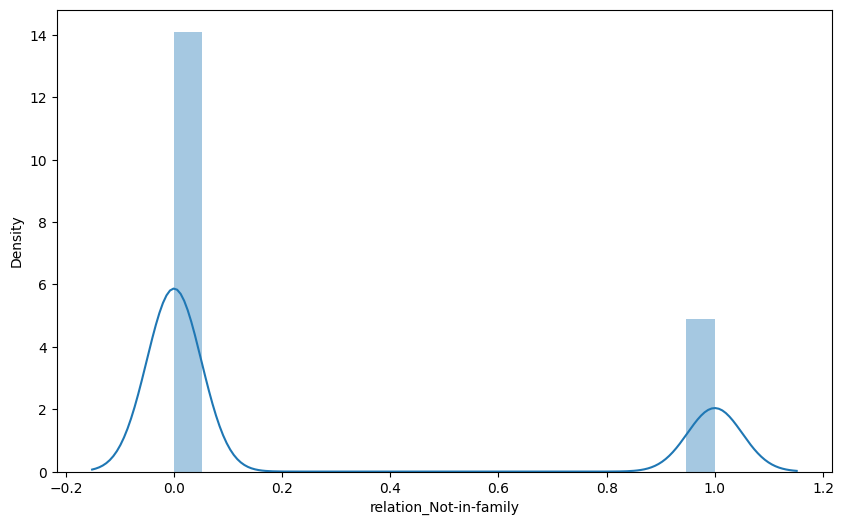

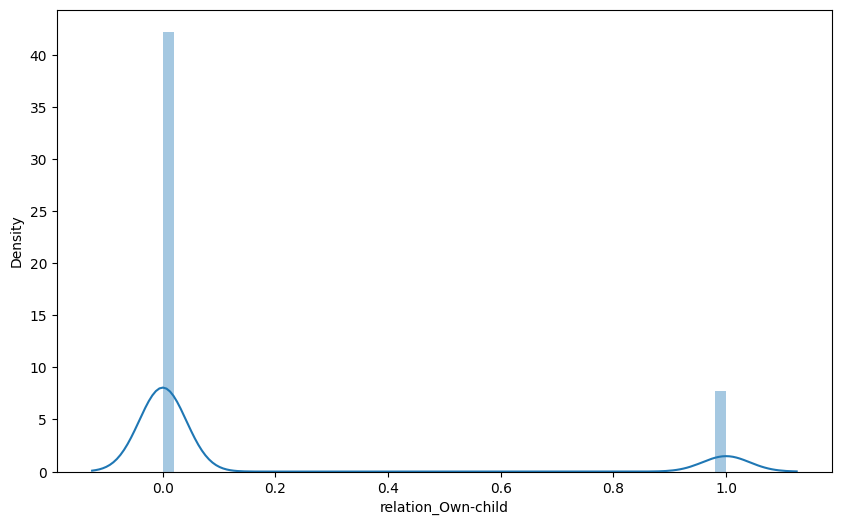

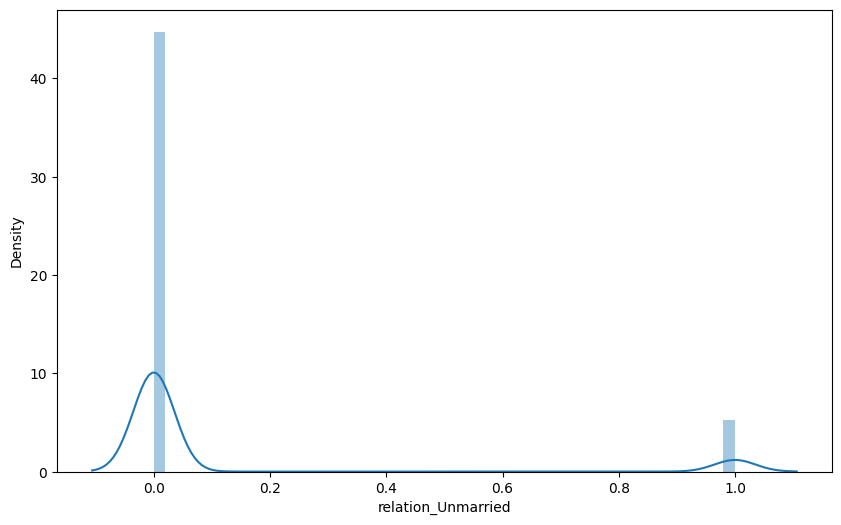

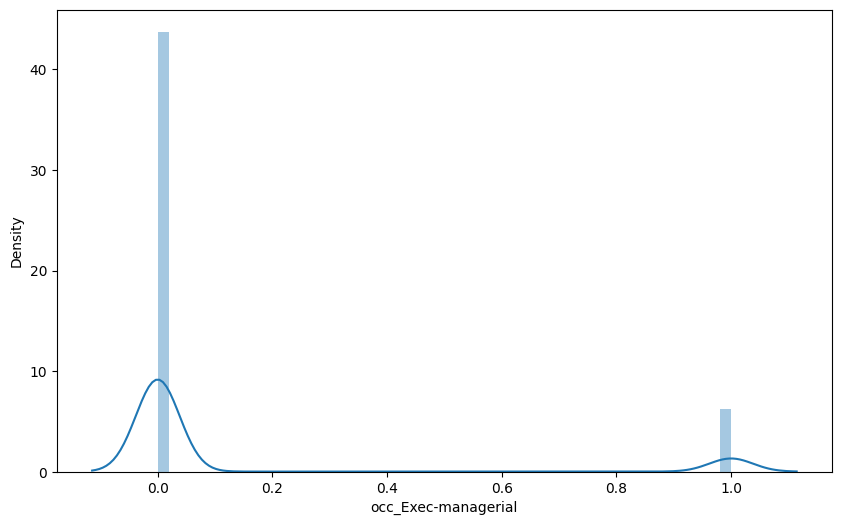

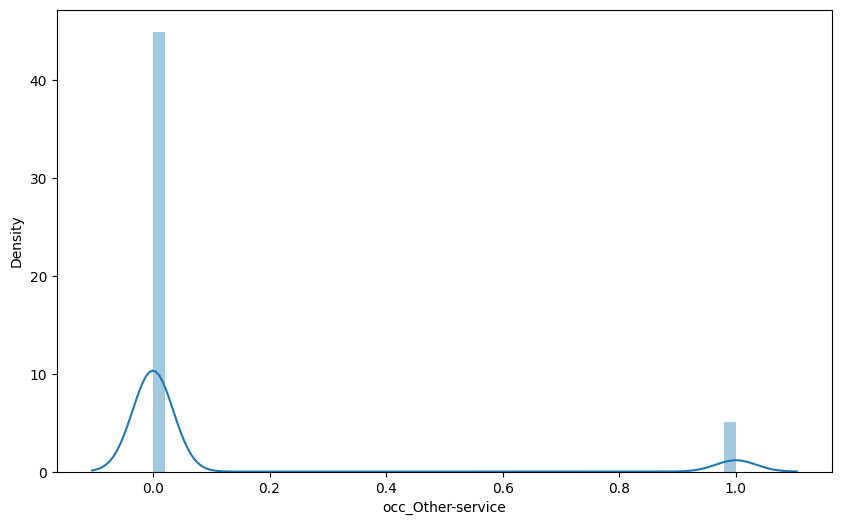

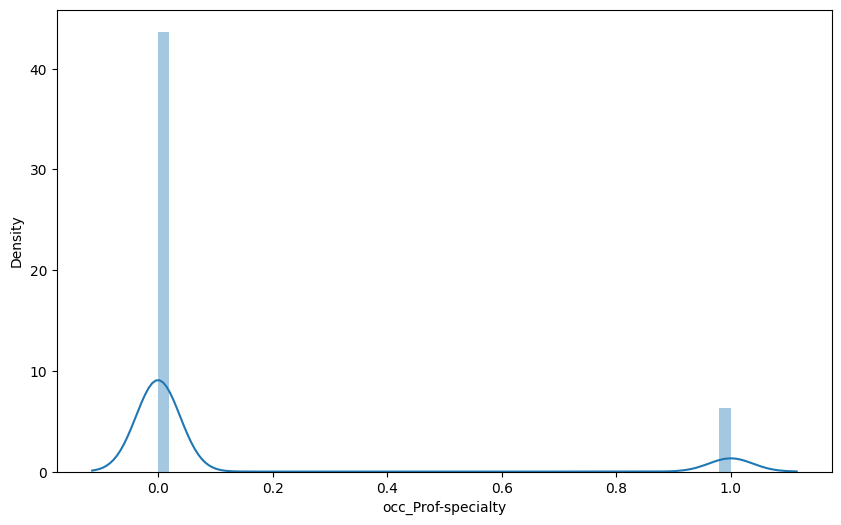

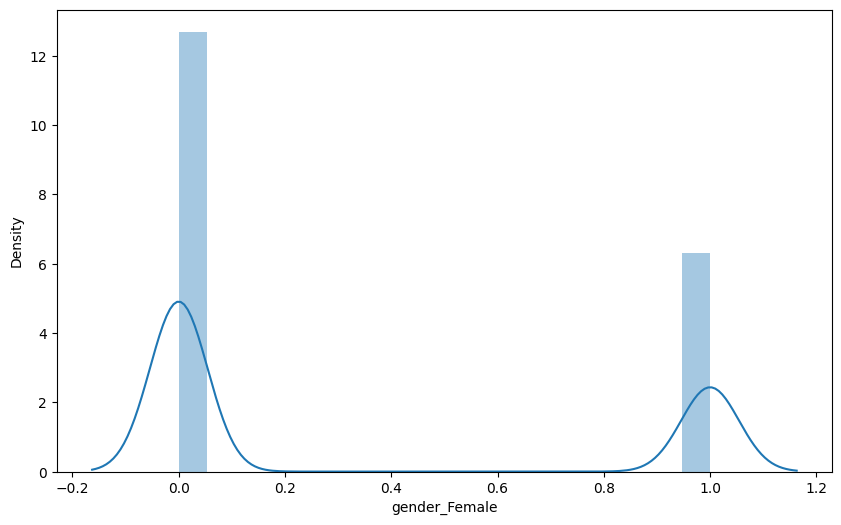

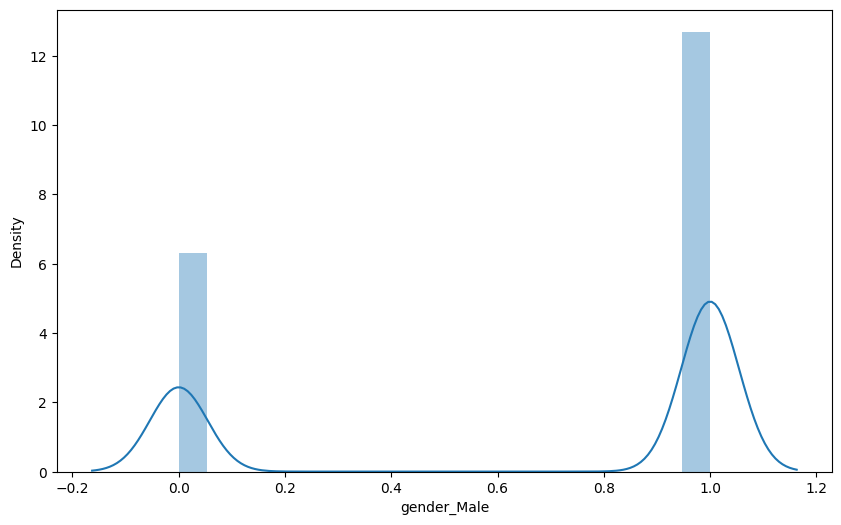

In [58]:
#check dist of all columns
for col in df1.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df1[col])
  plt.show()


In [ ]:
#NOW create the model
#splitting 
x = df1.drop(['income'],axis=1)
y = df1['income']

#Apply the train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#model selections
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#objects
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
svc = SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()
lgb = LGBMClassifier()
cat = CatBoostClassifier()

#Fittings
lr.fit(x_train_scaled,y_train)
rf.fit(x_train_scaled,y_train)
gb.fit(x_train_scaled,y_train)
xgb.fit(x_train_scaled,y_train)
svc.fit(x_train_scaled,y_train)
knn.fit(x_train_scaled,y_train)
nb.fit(x_train_scaled,y_train)
lgb.fit(x_train_scaled,y_train)
cat.fit(x_train_scaled,y_train)



In [60]:
#preds
lrpred = lr.predict(x_test_scaled)
rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
svcpred = svc.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)
nbpred = nb.predict(x_test_scaled)
lgbpred = lgb.predict(x_test_scaled)
catpred = cat.predict(x_test_scaled)

#Evaluations
from sklearn.metrics import accuracy_score
lracc = accuracy_score(y_test,lrpred)
rfacc = accuracy_score(y_test,rfpred)
gbacc = accuracy_score(y_test,gbpred)
xgbacc = accuracy_score(y_test,xgbpred)
svcacc = accuracy_score(y_test,svcpred)
knnacc = accuracy_score(y_test,knnpred)
nbacc = accuracy_score(y_test,nbpred)
lgbacc = accuracy_score(y_test,lgbpred)
catacc = accuracy_score(y_test,catpred)

print('LOGISTIC REG',lracc)
print('RANDOM FOREST',rfacc)
print('GB',gbacc)
print('XGB',xgbacc)
print('SVC',svcacc)
print('KNN',knnacc)
print('NB',nbacc)
print('LIGHT GBM',lgbacc)
print('CATO',catacc)

LOGISTIC REG 0.8482956290306071
RANDOM FOREST 0.8522878493192753
GB 0.8692803767018119
XGB 0.8719418568942573
SVC 0.8538233186610708
KNN 0.8383662606203296
NB 0.7455215477530965
LIGHT GBM 0.8716347630258983
CATO 0.8724536800081891
